# PetFinder.my Adoption Prediction: an initial look at the data

## Introduction

This notebook is the first part of the analysis of the data for the [PetFinder.my Adoption Prediction competition](https://www.kaggle.com/c/petfinder-adoption-prediction) on Kaggle. I only look here at the `train.csv` and `test.csv` datasets; those relating to images and descriptions (e.g. those in `train_sentiment` and `train_metadata`) are considered in the feature engineering notebook (`feature_engineering.ipynb`).

## Libraries

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Data loading

In [2]:
DATA_PATH = os.path.join(os.pardir, 'data', 'raw')

In [3]:
!ls {DATA_PATH}

breed_labels.csv       test.csv		   train.csv
color_labels.csv       test_images.zip	   train_images.zip
sample_submission.csv  test_metadata.zip   train_metadata.zip
sentiment	       test_sentiment.zip  train_sentiment.zip
state_labels.csv       test.zip		   train.zip


In [4]:
all_train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
all_test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))

## Function definitions

Useful functions for data visualisation, all grouped together here for ease of finding later.

In [5]:
def display_all_vars(df):
    """
    By default, the display() function for a pandas dataframe only shows a limited number of the total columns of the df.
    This function provides a wrapper that temporarily changes that behaviour
    """
    with pd.option_context("display.max_columns", 1000):
        display(df)

In [6]:
def train_test_catplot(var_name:str):
    """
    Plots sns.catplot() for a variable in both the training and test datasets
    """
    _, ax = plt.subplots(1, 2, figsize=(12, 5))
    g = sns.catplot(x=var_name, data=all_train, kind='count', ax=ax[0])
    ax[0].set_title('Train')
    plt.close(g.fig)
    g = sns.catplot(x=var_name, data=all_test, kind='count', ax=ax[1])
    ax[1].set_title('Test')
    plt.close(g.fig)
    plt.show()

In [7]:
def speed_catplot(var_name:str, title1:str, title2:str):
    """
    Plots both within and between-variable sns.catplot() for AdoptionSpeed
    """
    _, ax = plt.subplots(1, 2, figsize=(12, 5))
    g = sns.catplot(x=var_name, hue='AdoptionSpeed', data=all_train, kind='count', ax=ax[0])
    ax[0].set_title(title1)
    plt.close(g.fig)
    g = sns.catplot(x='AdoptionSpeed', hue=var_name, data=all_train, kind='count', ax=ax[1])
    ax[1].set_title(title2)
    plt.close(g.fig)
    plt.show()

## Data summaries

### Data frame sizes

In [10]:
print(f"The training data contains {all_train.shape[0]} observations and {all_train.shape[1]} features")
print(f"The testing data contains {all_test.shape[0]} observations and {all_test.shape[1]} features")

The training data contains 14993 observations and 24 features
The testing data contains 3948 observations and 23 features


The missing feature in the testing data is the prediction target `AdoptionSpeed`.

### Data frame heads

The values of the top 5 rows of both the training and testing datasets. All variables are included.

In [11]:
display_all_vars(all_train.head().T)

,0,1,2,3,4
Type,2,2,1,1,1
Name,Nibble,No Name Yet,Brisco,Miko,Hunter
Age,3,1,1,4,1
Breed1,299,265,307,307,307
Breed2,0,0,0,0,0
Gender,1,1,1,2,1
Color1,1,1,2,1,1
Color2,7,2,7,2,0
Color3,0,0,0,0,0
MaturitySize,1,2,2,2,2


In [14]:
display_all_vars(all_test.head().T)

,0,1,2,3,4
Type,1,2,2,2,1
Name,Puppy,London,Snowball,Malibu,Lala Girl
Age,2,24,20,5,6
Breed1,307,266,266,266,307
Breed2,0,0,0,252,0
Gender,1,1,2,2,2
Color1,1,2,7,1,1
Color2,0,7,0,6,2
Color3,0,0,0,7,7
MaturitySize,2,2,2,2,2


### Descriptive statistics

Basic descriptive statistics for each feature in the training and testing data.

In [16]:
display_all_vars(all_train.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Type,14993,NaN,NaN,NaN,1.45761,0.498217,1,1,1,2,2
Name,13736,9060,Baby,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,14993,NaN,NaN,NaN,10.4521,18.1558,0,2,3,12,255
Breed1,14993,NaN,NaN,NaN,265.273,60.0568,0,265,266,307,307
Breed2,14993,NaN,NaN,NaN,74.0097,123.012,0,0,0,179,307
Gender,14993,NaN,NaN,NaN,1.77616,0.681592,1,1,2,2,3
Color1,14993,NaN,NaN,NaN,2.23418,1.74523,1,1,2,3,7
Color2,14993,NaN,NaN,NaN,3.22284,2.74256,0,0,2,6,7
Color3,14993,NaN,NaN,NaN,1.88201,2.98409,0,0,0,5,7
MaturitySize,14993,NaN,NaN,NaN,1.862,0.547959,1,2,2,2,4


In [17]:
display_all_vars(all_test.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Type,3948,NaN,NaN,NaN,1.52609,0.499382,1,1,2,2,2
Name,3645,2855,Brownie,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,3948,NaN,NaN,NaN,11.5646,18.5684,0,2,4,12,180
Breed1,3948,NaN,NaN,NaN,263.033,59.1781,2,265,266,307,307
Breed2,3948,NaN,NaN,NaN,57.3594,112.087,0,0,0,0,307
Gender,3948,NaN,NaN,NaN,1.78267,0.692633,1,1,2,2,3
Color1,3948,NaN,NaN,NaN,2.23202,1.73661,1,1,2,3,7
Color2,3948,NaN,NaN,NaN,3.35562,2.70014,0,0,3,6,7
Color3,3948,NaN,NaN,NaN,2.0613,3.04136,0,0,0,6,7
MaturitySize,3948,NaN,NaN,NaN,1.82447,0.569772,1,1,2,2,4


### Feature datatypes

The (pandas) datatype of each feature in both the training and testing data.

In [18]:
all_train.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [19]:
all_test.dtypes

Type              int64
Name             object
Age               int64
Breed1            int64
Breed2            int64
Gender            int64
Color1            int64
Color2            int64
Color3            int64
MaturitySize      int64
FurLength         int64
Vaccinated        int64
Dewormed          int64
Sterilized        int64
Health            int64
Quantity          int64
Fee               int64
State             int64
RescuerID        object
VideoAmt          int64
Description      object
PetID            object
PhotoAmt        float64
dtype: object

The majority of features are numeric (either int64 or float64). However, many of these are actually numeric representations of categorical data and will be treated as such during visualisation.

### Missing values

In [20]:
all_train.isna().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

In [21]:
all_test.isna().sum()

Type              0
Name            303
Age               0
Breed1            0
Breed2            0
Gender            0
Color1            0
Color2            0
Color3            0
MaturitySize      0
FurLength         0
Vaccinated        0
Dewormed          0
Sterilized        0
Health            0
Quantity          0
Fee               0
State             0
RescuerID         0
VideoAmt          0
Description       2
PetID             0
PhotoAmt          0
dtype: int64

Very few variables have missing values. Those that do are both text data and not considered during the EDA in this notebook. I return to them in the feature engineering notebook.

## Target feature: Adoption Speed

The goal of the competition is to predict the Adoption Speed. This feature consists of five categories, represented by numbers 0 - 4. The meanings of each category, as listed in the competition information on Kaggle, are:

- 0 - Pet was adopted on the same day as it was listed.
- 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
- 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
- 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
- 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).


As this feature is, of course, absent in the testing data, this section examines only the training data.

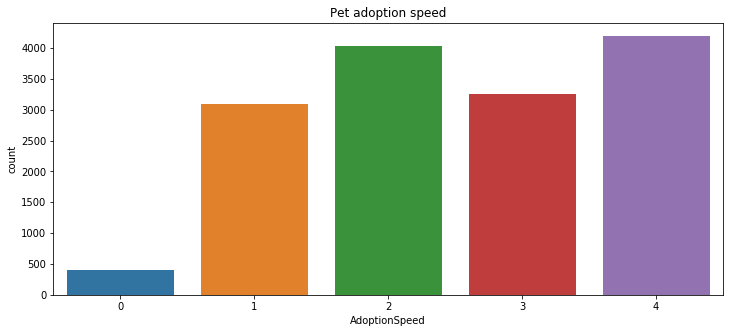

In [26]:
plt.figure(figsize=(12, 5))
sns.countplot(x='AdoptionSpeed', data=all_train)
plt.title('Pet adoption speed')
plt.show()

Very few pets are adopted the same day as they are listed (0). However, there is very little in the way of a clear pattern in the remaining adoption speed categories. Almost an equal number of pets wait either between 1 and 7 days (1) or between 31 and 90 days (3). Very slightly more are listed for over 100 days (4) than between 8 and 30 days (2), although this difference appeares largely negligable.